# Handwritten digit classification using Keras

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Load the MNIST dataset 
mnist = tf.keras.datasets.mnist

# Create Training and Test sets
(x_train,y_train), (x_test,y_test) = mnist.load_data()
print(x_train[1])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [7]:
# Normalize the data by dividing their maximum values
(x_train,x_test) = tf.cast(x_train/np.max(x_train),tf.float32), tf.cast(x_test/np.max(x_test),tf.float32)
(y_train,y_test) = tf.cast(y_train,tf.int64), tf.cast(y_test,tf.int64)
print(x_train)

tf.Tensor(
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]

In [8]:
# Step - 1: Define the Model. Three layer Network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = 'relu')) # Hidden Layer 1 with 256 neurons
model.add(tf.keras.layers.Dense(128, activation = 'relu')) # Hidden Layer 2 with 128 neurons
model.add(tf.keras.layers.Dense(10, activation = 'softmax')) # Output Layer with 10 neurons as Image number are bertween 0 to 9

In [9]:
# Step - 2: Compile the Model by using Stocastic Gradient Decent
model.compile(optimizer = 'sgd',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


In [10]:
# Step - 3: Train the Model
model.fit(x_train, y_train, batch_size = 32, epochs = 10)
model.save("mnist-model.h5")

Epoch 1/10
1875/1875 [==============================] - 3s 712us/step - loss: 0.6009 - accuracy: 0.8440
Epoch 2/10
1875/1875 [==============================] - 1s 696us/step - loss: 0.2835 - accuracy: 0.9187
Epoch 3/10
1875/1875 [==============================] - 1s 696us/step - loss: 0.2298 - accuracy: 0.9342
Epoch 4/10
1875/1875 [==============================] - 1s 694us/step - loss: 0.1942 - accuracy: 0.9446
Epoch 5/10
1875/1875 [==============================] - 1s 688us/step - loss: 0.1689 - accuracy: 0.9515
Epoch 6/10
1875/1875 [==============================] - 1s 698us/step - loss: 0.1487 - accuracy: 0.9577
Epoch 7/10
1875/1875 [==============================] - 1s 695us/step - loss: 0.1330 - accuracy: 0.9616
Epoch 8/10
1875/1875 [==============================] - 1s 693us/step - loss: 0.1195 - accuracy: 0.9659
Epoch 9/10
1875/1875 [==============================] - 1s 691us/step - loss: 0.1086 - accuracy: 0.9690
Epoch 10/10
1875/1875 [==============================] - 1s 697u

In [11]:
# Evaluate the Model on Test set
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 468us/step - loss: 0.1120 - accuracy: 0.9656


[0.11197563260793686, 0.9656000137329102]

In [12]:
# Load the Model Weights
model.load_weights("mnist-model.h5")

C:\Users\Aniket-Admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Actual Digit in Image:  tf.Tensor(5, shape=(), dtype=int64)


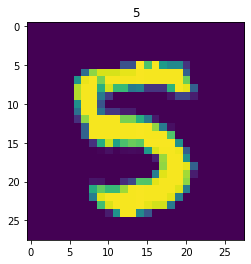

Predicted Digit in Image:  5


In [13]:
# Predict the new Image
img = x_test[120]
test_img = tf.reshape(img,(1,784))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]

print("Actual Digit in Image: ", y_test[120])
# Plot the Actual Image
img = tf.reshape(img,(28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

print("Predicted Digit in Image: ", classname)